In [1]:
#import the labraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#read the data from csv which given url 
url=("C:\\Users\\GUDO JI\\Desktop\\Students.score.csv")
df=pd.read_csv(url)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,40
5,1.5,40
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
#inpsect the various aspects of our data frame
print("row : " ,df.shape[0])
print("columns :",df.shape[1])

row :  25
columns : 2


In [8]:
#Data.info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [9]:
# Data_describe
df.describe()

,Hours,Scores
count,25.000000,25.00000
mean,5.012000,52.68000
std,2.525094,24.25682
min,1.100000,17.00000
25%,2.700000,30.00000
50%,4.800000,47.00000
75%,7.400000,75.00000
max,9.200000,95.00000


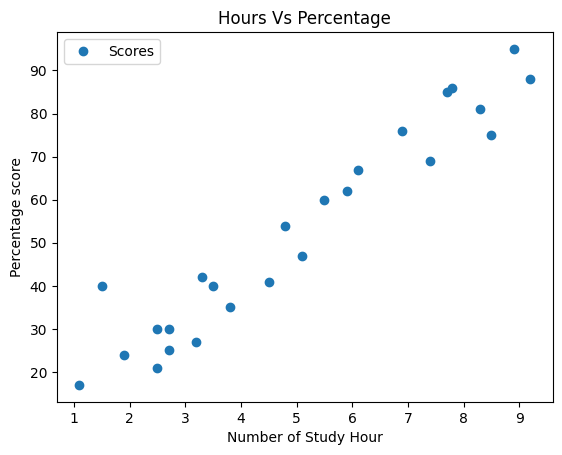

In [49]:
#plotting the distribution scores
df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours Vs Percentage')
plt.xlabel('Number of Study Hour')
plt.ylabel('Percentage score')

plt.show()


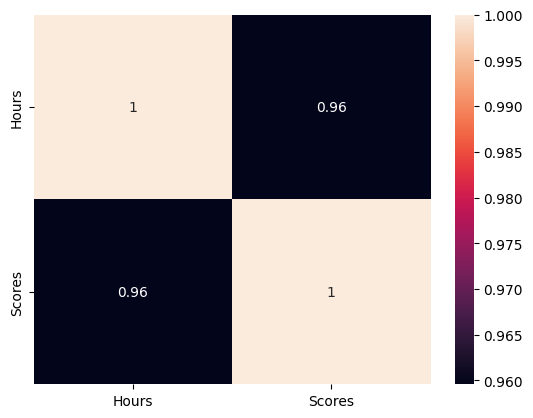

In [50]:
# check for correction
sns.heatmap(df.corr(),annot=True)
plt.show()

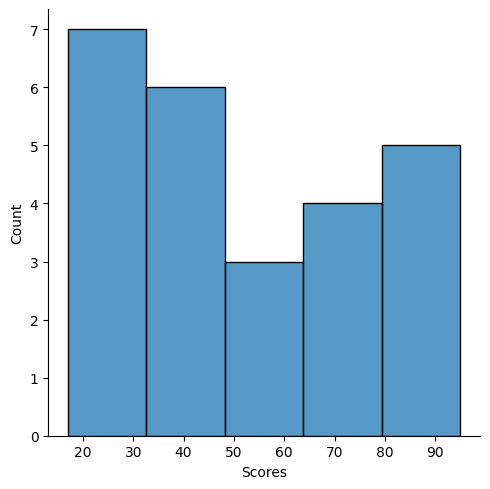

In [57]:
#To check for distribution of scores in dataset

sns.displot(df['Scores'], bins=5)
plt.show()

In [58]:
x=df.iloc[:,:1].values
y=df.iloc[:,1].values

In [80]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [81]:
#now Lets take a look at train and test dataset individually
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20, 1)
(20,)
(5, 1)
(5,)


In [82]:
x_train

array([[2.7],
       [3.3],
       [5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [83]:
y_train

array([25, 42, 47, 35, 40, 27, 41, 95, 75, 40, 30, 24, 54, 67, 86, 60, 85,
       17, 69, 88], dtype=int64)

In [84]:
x_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9]])

In [85]:
y_test

array([81, 30, 21, 76, 62], dtype=int64)

In [105]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train, y_train)
print("Training Completed.")

Training Completed.


In [136]:
#plotting the regression line
line = lr.coef_*x+lr.intercept_

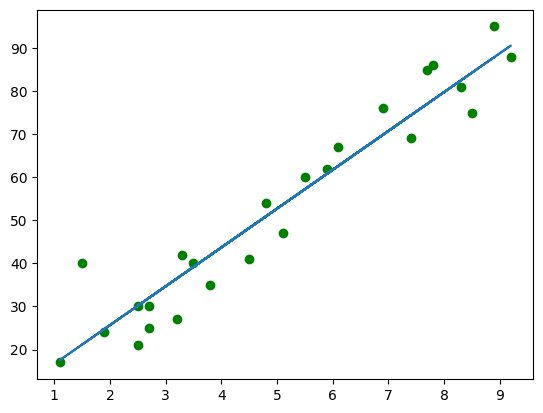

In [137]:
#plotting for the test dat
plt.scatter(x, y, c='g')
plt.plot(x,line);
plt.show()

In [140]:
print("Train Score :", lr.score(x_train,y_train)*100)
print("Testing Score : ", lr.score(x_test,y_test)*100)

Train Score : 91.04881245690748
Testing Score :  95.7242851276866


In [142]:
print("x_test")
print(x_test)
print()
print("y_test")
print(y_test)
print()

x_test
[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]

y_test
[81 30 21 76 62]



In [147]:
#Predicting Score
y_pred = lr.predict(x_test)
print("y_pred :")
print(y_pred)

y_pred :
[82.45236764 30.17879509 30.17879509 69.83460875 60.82192383]


In [150]:
#comparing Acutual Vs Predicted
dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
dataframe

,Actual,Predicted
0,81,82.452368
1,30,30.178795
2,21,30.178795
3,76,69.834609
4,62,60.821924


In [154]:
#we can test our data
hours=9.25
own_pred=lr.predict([[hours]])
print("No. of study = {}" .format(hours))
print("Predicted Score = {}" . format(own_pred[0]))

No. of study = 9.25
Predicted Score = 91.01441831485445


In [155]:
from sklearn import metrics

In [158]:
print("Mean Absolute  Error :", metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute  Error : 3.6306850496852716


In [159]:
print("Mean Squared  Error :", metrics.mean_squared_error(y_test,y_pred))

Mean Squared  Error : 25.158306308692026


In [ ]:
print("Mean Absolute  Error :", metrics.mean_absolute_error(y_test,y_pred))